In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
%run functions.ipynb
%run Appliance_Information_Tools.ipynb
random.seed(42)

In [40]:
house = read_clean_house(7, 8000000, drop_appliances=True)
processed = thirty_min_steps_and_explicit_time_features(house)

#neu
processed = encode_cyclical(processed)
#neu

scaler, sequences = standardizing_and_sequencing(processed)
features_list, labels_list = features_list_and_labels_list(sequences)
X_train_arr, X_test_arr, X_validate_arr, y_train_arr, y_test_arr, y_validate_arr= split_and_to_numpy(features_list, labels_list, .7, .15)


In [41]:
#ka warum, aber in y_train_arr sind in einer zeile 3 nans...
y_train_arr = forward_fill_not_first_NaNs(y_train_arr)

In [63]:
model = Sequential()
model.add(Input(shape=(X_train_arr.shape[1], X_train_arr.shape[2])))  # Add Input layer explicitly
model.add(LSTM(50, activation='tanh',return_sequences=True, dropout=0.4, recurrent_dropout=0.4))
model.add(LSTM(100, activation='tanh',return_sequences=True, dropout=0.4, recurrent_dropout=0.4))
model.add(LSTM(50, activation = 'relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6))  # Assuming you are predicting 6 future time steps

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [64]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=20, verbose=1, mode='min', restore_best_weights=True)

In [65]:
history = model.fit(X_train_arr, y_train_arr,
                    epochs=200,
                    validation_data=(X_validate_arr, y_validate_arr),
                    batch_size=10,
                    verbose=2,
                    callbacks=[early_stopping])


Epoch 1/200
140/140 - 5s - 34ms/step - loss: 0.9564 - val_loss: 0.8325
Epoch 2/200
140/140 - 1s - 10ms/step - loss: 0.9158 - val_loss: 0.8275
Epoch 3/200
140/140 - 1s - 10ms/step - loss: 0.8841 - val_loss: 0.8278
Epoch 4/200
140/140 - 2s - 11ms/step - loss: 0.8650 - val_loss: 0.7942
Epoch 5/200
140/140 - 2s - 11ms/step - loss: 0.8595 - val_loss: 0.8057
Epoch 6/200
140/140 - 1s - 10ms/step - loss: 0.8640 - val_loss: 0.7759
Epoch 7/200
140/140 - 1s - 10ms/step - loss: 0.8521 - val_loss: 0.7920
Epoch 8/200
140/140 - 2s - 11ms/step - loss: 0.8513 - val_loss: 0.7765
Epoch 9/200
140/140 - 2s - 11ms/step - loss: 0.8434 - val_loss: 0.7919
Epoch 10/200
140/140 - 1s - 10ms/step - loss: 0.8549 - val_loss: 0.7828
Epoch 11/200
140/140 - 1s - 10ms/step - loss: 0.8443 - val_loss: 0.7614
Epoch 12/200
140/140 - 1s - 11ms/step - loss: 0.8495 - val_loss: 0.7697
Epoch 13/200
140/140 - 2s - 12ms/step - loss: 0.8381 - val_loss: 0.7744
Epoch 14/200
140/140 - 2s - 11ms/step - loss: 0.8474 - val_loss: 0.7716
E

In [66]:
label=pd.DataFrame(y_test_arr)
label = label.transpose()
label = pd.DataFrame(scaler.inverse_transform(label))
#label.plot()

In [67]:
prediction=pd.DataFrame(model.predict(X_test_arr))
prediction = prediction.transpose()
prediction = pd.DataFrame(scaler.inverse_transform(prediction))
#prediction.plot()

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [68]:
prediction.corrwith(label).mean()

0.26287411837964664

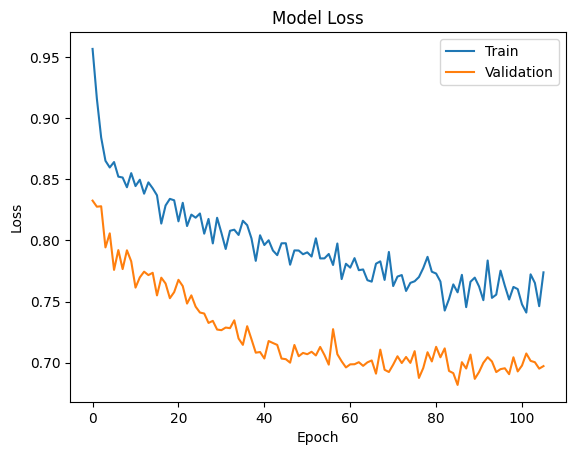

In [69]:

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [74]:
x_tesplt.plot(scaler.inverse_transform(X_test_arr[0]))
plt.show()

array([[[ 0.00000000e+00, -2.58819045e-01,  9.65925826e-01, ...,
          8.66025404e-01,  5.00000000e-01, -5.02063214e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          8.66025404e-01,  5.00000000e-01, -6.54300179e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          8.66025404e-01,  5.00000000e-01, -6.77738235e-01],
        ...,
        [ 0.00000000e+00,  8.66025404e-01, -5.00000000e-01, ...,
          8.66025404e-01,  5.00000000e-01, -5.36833953e-01],
        [ 0.00000000e+00,  8.66025404e-01, -5.00000000e-01, ...,
          8.66025404e-01,  5.00000000e-01, -6.05374426e-01],
        [ 0.00000000e+00,  7.07106781e-01, -7.07106781e-01, ...,
          8.66025404e-01,  5.00000000e-01, -6.44323519e-01]],

       [[ 0.00000000e+00,  9.65925826e-01, -2.58819045e-01, ...,
          1.22464680e-16, -1.00000000e+00, -5.49303946e-01],
        [ 0.00000000e+00,  8.66025404e-01, -5.00000000e-01, ...,
          1.22464680e-16, -1.00000000e